In [4]:
# import relevant Libraies

# DATA WRANGLING AND SUMMARIZATIONO
import pandas            as pd
import numpy             as np
from missingno           import matrix
from skimpy              import skim

#DATA VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn           as sns

# MACHINE LEARNING 
import xgboost           as  xgb

#PS - IF Sklearn is to be used, i will import only the necessary models

#### DATA IMPORTATION AND PREVIEW

In [5]:
#IMPORT TRAIN DATASET
train =  pd.read_csv('Train.csv')

#IMPORT TEST DATASET
test =  pd.read_csv('Test.csv')

## CLEANING AND MODELLING TRAIN DATA 

#### PREVIEW AND SUMMARIZE

In [6]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


<AxesSubplot:>

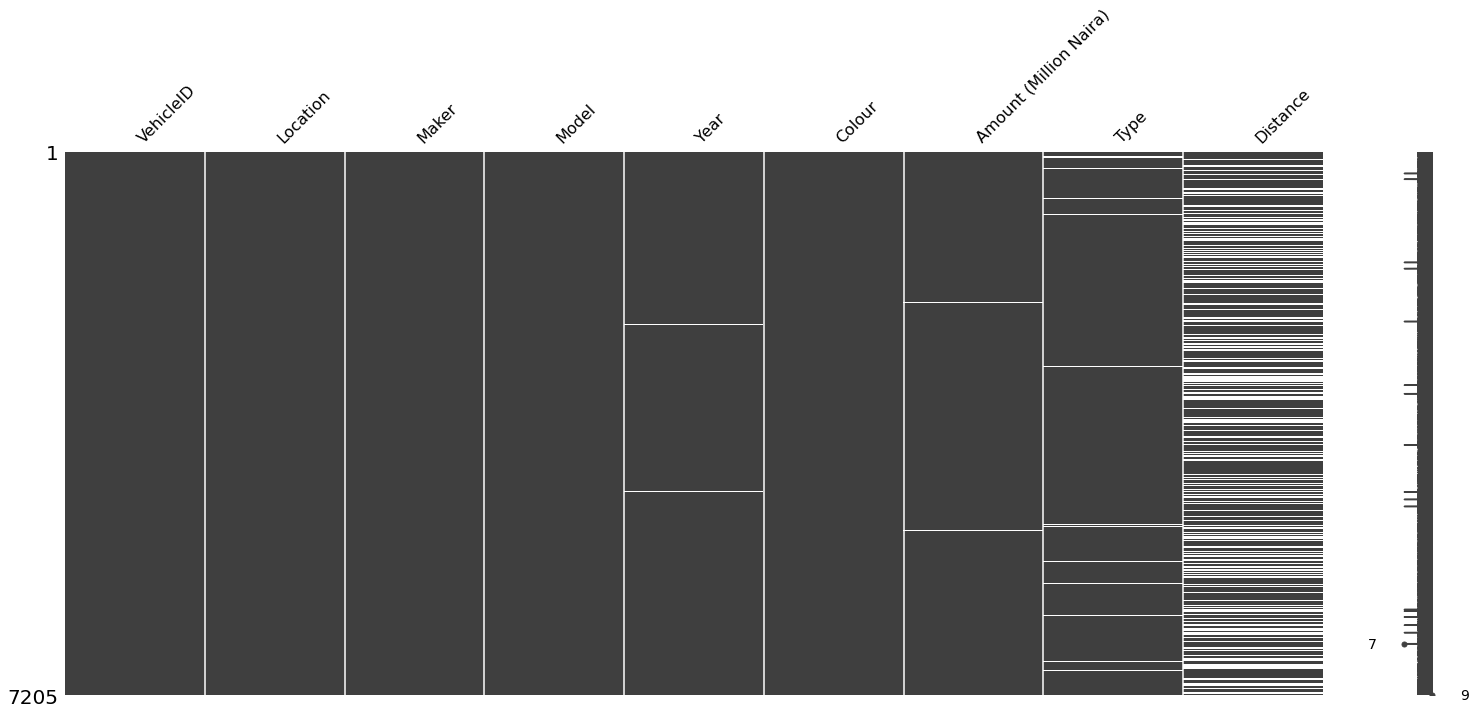

In [9]:
matrix(train)

#### RENAMING AMOUNT COLUMN


In [10]:
# rename Amount (Million Naira)
train.rename(columns={"Amount (Million Naira)": "Amount"}, inplace = True)

#### STRING CLEANING AND TYPE FORMATING 

In [15]:
removecomma = ['Distance', 'Year']

for item in removecomma:
    train[item] = train[item].str.replace(',','')
    train[item] = train[item].astype(float)

In [16]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount,Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0


#### CHECK FOR DUPLICATES

In [28]:
# Vechile ID are unique, so lest determin if there are duplicate data 
train[train[['VehicleID','Location', 'Maker']].duplicated(keep = False)].sort_values('VehicleID')

#the duplicates are not really duplicates since that 

,VehicleID,Location,Maker,Model,Year,Colour,Amount,Type,Distance
1774,VHL10108,Abuja,Toyota,Corolla,2014.0,Black,6.00,Foreign Used,NaN
181,VHL10108,Abuja,Toyota,Land Cruiser Prado,2014.0,Black,16.31,Nigerian Used,95945.0
7143,VHL10231,Lagos,Lexus,ES 350,2011.0,Black,4.30,Nigerian Used,254635.0
5649,VHL10231,Lagos,Lexus,RX 350,2011.0,Gold,9.00,Foreign Used,40521.0
1560,VHL10273,Lagos,Lexus,RX,2010.0,Black,9.20,Foreign Used,NaN
...,...,...,...,...,...,...,...,...,...
2116,VHL19948,Lagos,Lexus,RX 350 AWD,2015.0,White,13.00,Foreign Used,85000.0
6553,VHL19948,Lagos,Lexus,ES 350,2012.0,Red,6.77,Foreign Used,140000.0
2185,VHL19948,Lagos,Lexus,RX 330,2006.0,Silver,4.90,Foreign Used,4135.0
4261,VHL19968,Abuja,Mercedes-Benz,M Class ML 350 4Matic,2007.0,Gold,2.95,Nigerian Used,130046.0


#### DROP IRRELEVANT COLUMNS  BEFORE EDA

In [30]:
train.drop(columns = 'VehicleID', inplace = True)

#### EDA OF CURRENT DATA 

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  7205 non-null   object 
 1   Maker     7205 non-null   object 
 2   Model     7205 non-null   object 
 3   Year      7184 non-null   float64
 4   Colour    7205 non-null   object 
 5   Amount    7188 non-null   float64
 6   Type      7008 non-null   object 
 7   Distance  4845 non-null   float64
dtypes: float64(3), object(5)
memory usage: 450.4+ KB


In [42]:
for col in train.columns :
    if train[col].dtype == 'O':
        print(col)
        print(train[col].unique())
        print()

Location
['Abuja' 'Ibadan' 'Lagos']

Maker
['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus']

Model
['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... 'Almera 1.6 Lux'
 'X5 3.0i Sports Activity' '320i SV Premium']

Colour
['Silver' 'Red' 'Blue' 'Black' 'Gold' 'White' 'Gray' 'Burgandy' 'Green'
 'Violet' 'Brown' 'Yellow' 'Orange' 'Pink' 'Beige' 'Purple' 'Ivory' 'G'
 'Teal' 'Mica' 'Pearl']

Type
['Nigerian Used' 'Foreign Used' 'Brand New' nan]



<AxesSubplot:>

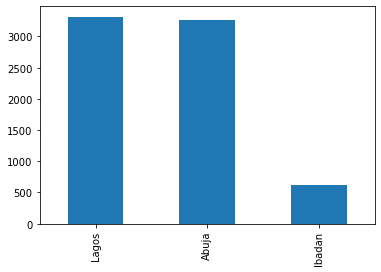

In [48]:
#Distribution of Cars by location
train.Location.value_counts().plot(kind = 'bar')

<AxesSubplot:>

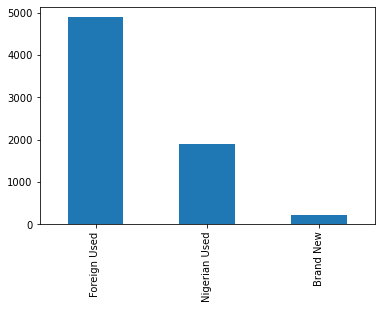

In [66]:
#Distribution of Cars by Type
train.Type.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Location'>

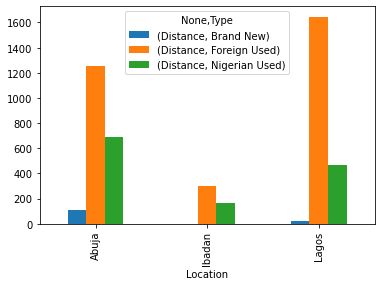

In [80]:
train[['Type','Location', 'Distance']].groupby(['Location','Type']).count().unstack().plot(kind  = 'bar')

<AxesSubplot:>

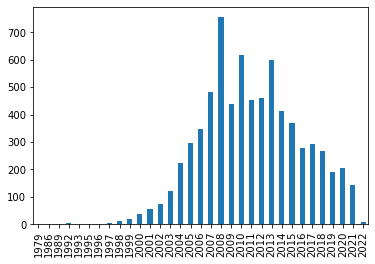

In [51]:
## Distibution of cars by year
train.Year[train.Year.notna()].astype(int).value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:xlabel='Type', ylabel='Distance'>

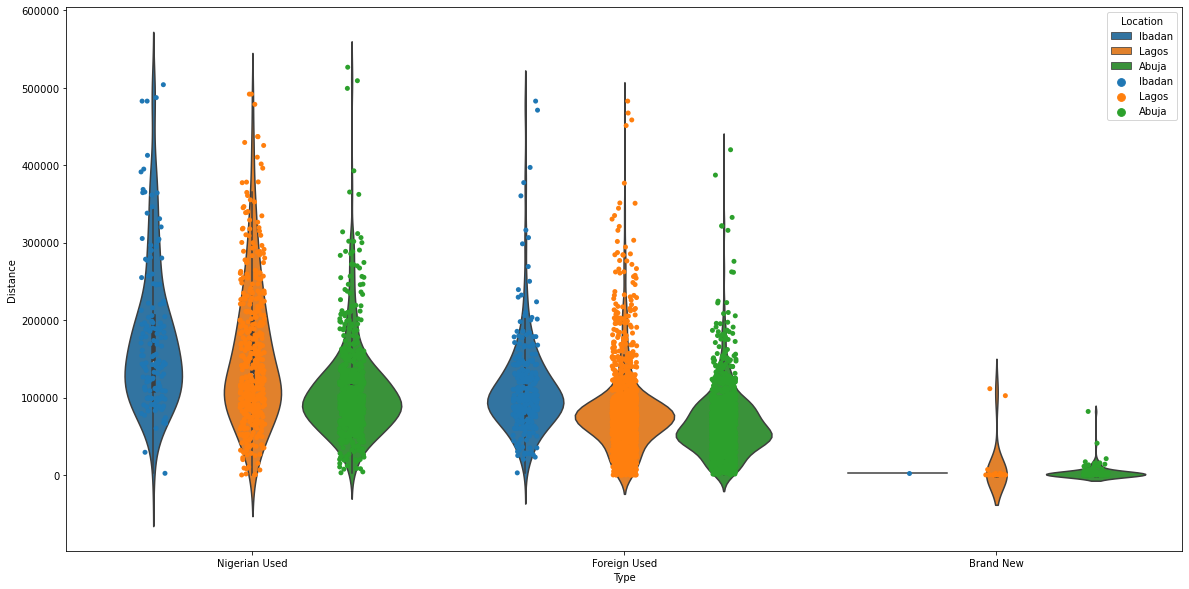

In [54]:
##create a list of verified values of type and distance
typexDis_noNull = train[['Type', 'Distance','Location']][(train.Type.notna()) & (train.Distance.notna())]

f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = typexDis_noNull[typexDis_noNull.Distance < 600000], x='Type', y = 'Distance', hue = 'Location', dodge=True )
sns.stripplot( data = typexDis_noNull[typexDis_noNull.Distance < 600000], x='Type', y = 'Distance', hue = 'Location', dodge=True )


In [61]:
#UNDERSTAND THE DISTRIBUTION OF VALUES
typexDis_noNull.groupby(['Type','Location']).quantile(np.linspace(0,1,11)).unstack()

Distance                                        \
                            0.0      0.1      0.2       0.3       0.4   
Type          Location                                                  
Brand New     Abuja         3.0     23.0     60.6     127.8     486.8   
              Ibadan     3000.0   3000.0   3000.0    3000.0    3000.0   
              Lagos        15.0     20.0     23.8      45.3      95.0   
Foreign Used  Abuja        95.0  20000.0  35701.6   45000.0   52352.0   
              Ibadan     2690.0  60123.0  70912.0   84000.0   95088.0   
              Lagos         1.0  25000.0  47000.0   59971.0   68255.0   
Nigerian Used Abuja      2800.0  51225.8  65235.4   78561.6   86351.4   
              Ibadan     2113.0  88840.4  99050.4  120328.2  139076.8   
              Lagos         1.0  58775.0  81656.0   98431.5  113252.0   

                                                                          \
                             0.5       0.6       0.7       0.8       0.9   
Type          Location                                                     
Brand New     Abuja       1000.0    1026.4    1728.8    3849.6   10466.8   
              Ibadan      3000.0    3000.0    3000.0    3000.0    3000.0   
              Lagos        129.0     228.0     950.0    2196.8   35616.1   
Foreign Used  Abuja      58944.0   69626.4   80000.0   94228.0  120000.0   
              Ibadan     98450.0  108530.0  125000.0  142452.0  177539.0   
              Lagos      75000.0   83590.0   89534.0  101209.4  148668.0   
Nigerian Used Abuja      98000.0  106065.0  121154.2  135413.8  186593.4   
              Ibadan    147635.0  177863.8  195408.4  246180.8  326641.8   
              Lagos     133822.5  157390.0  188715.5  227276.0  288856.5   

                                   
                              1.0  
Type          Location             
Brand New     Abuja       82000.0  
              Ibadan       3000.0  
              Lagos      111408.0  
Foreign Used  Abuja      925343.0  
              Ibadan     850000.0  
              Lagos     1284898.0  
Nigerian Used Abuja     1321211.0  
              Ibadan    1250000.0  
              Lagos     1985400.0

<AxesSubplot:xlabel='Distance', ylabel='Amount'>

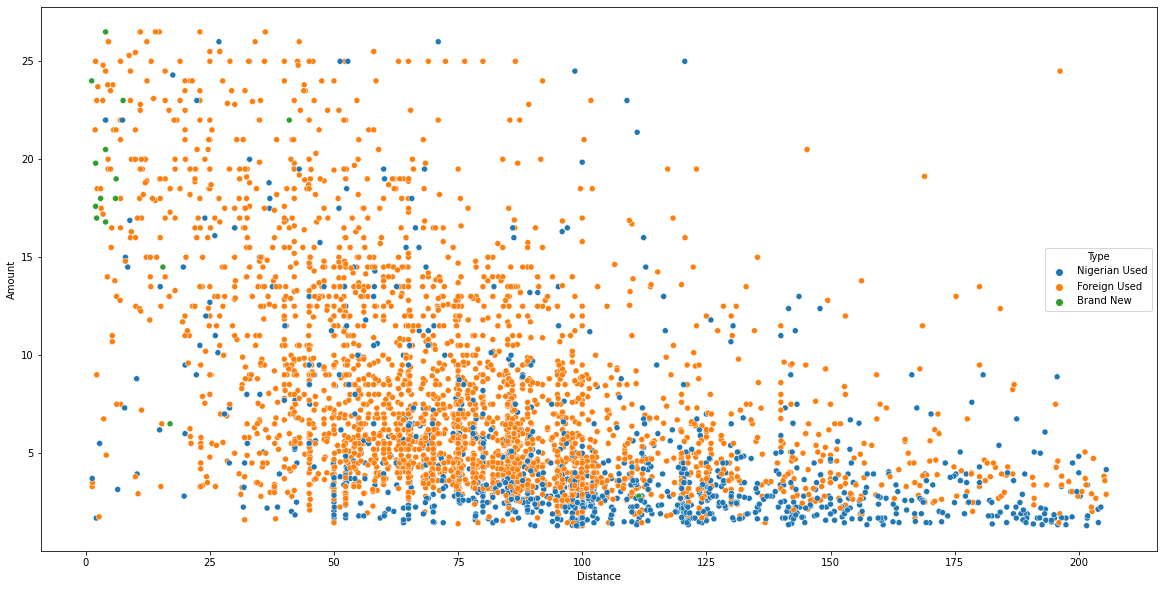

In [65]:
#Find if there is a correlation between anount and distance 
f, ax = plt.subplots(figsize=(20, 10))
corrAD = train[['Amount', 'Distance', 'Type']][train.Distance.notna()]
corrAD.Distance = corrAD.Distance/1000

corrAD = corrAD[ (corrAD['Amount']   >= corrAD['Amount'].quantile(0.025))
                &(corrAD['Amount']   <= corrAD['Amount'].quantile(0.925))
                &(corrAD['Distance'] >= corrAD['Distance'].quantile(0.025))
                &(corrAD['Distance'] <= corrAD['Distance'].quantile(0.925))
               ]

#fl = pd.DataFrame(train.Maker.value_counts())
#fl = list(fl.index[fl.Maker > 1000])

sns.scatterplot(data = corrAD, y = 'Amount' , x = 'Distance',  hue ='Type')

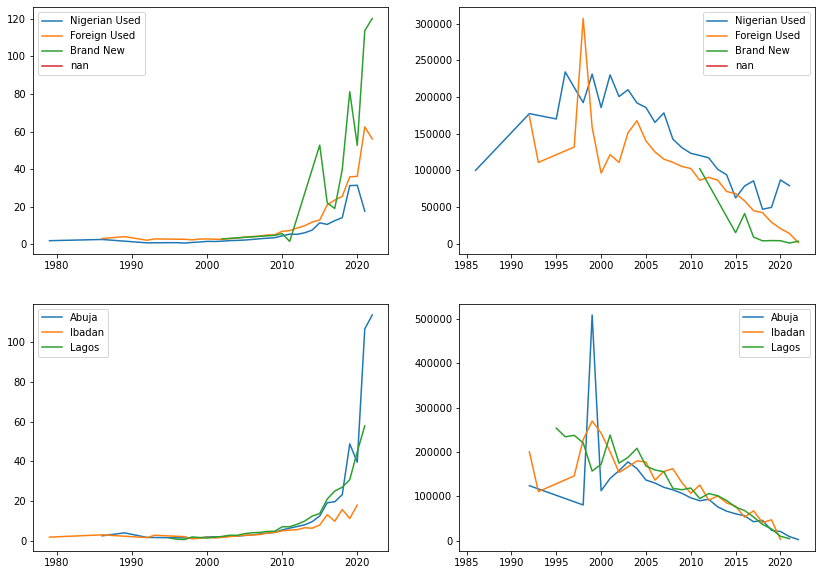

In [19]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects



for i in train.Type.unique():
    
    ax1.plot(train[train.Type == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax2.plot(train[train.Type == i].groupby('Year').agg({'Distance' : 'mean'}))
 
    
for i in train.Location.unique():
    
    ax3.plot(train[train.Location == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax4.plot(train[train.Location == i].groupby('Year').agg({'Distance' : 'mean'}))
    
    
ax1.legend(train.Type.unique())
#ax1.title('Price Distribution by Year and Type')

ax2.legend(train.Type.unique())
#ax2.title('Distance Distribution by Year and Type')

ax3.legend(train.Location.unique())
#ax3.title('Price Distribution by Year and Location')

ax4.legend(train.Location.unique())
#ax2.title('Distance Distribution by Year and Location')

In [118]:
# Understang the distribution of prices by  
a = pd.DataFrame(train[['Model', 'Amount']].groupby('Model').agg(['max','min', 'count']))

a['diff'] = a['Amount']['max'] - a['Amount']['min']


Amount                 diff
                          max    min count        
Model                                             
4-Runner                37.00   1.50    36   35.50
Accord                  19.00   0.56   132   18.44
Avalon                  32.00   1.13    51   30.87
C300                    58.00   1.40   199   56.60
Camry                   37.00   0.79   649   36.21
Corolla                 17.50   1.15   282   16.35
Corolla LE              17.00   1.46    47   15.54
E350                    55.00   1.30    90   53.70
ES                      19.00   1.69    71   17.31
ES 350                  13.50   3.00   299   10.50
ES 350 FWD              29.50   6.40    47   23.10
Edge                    12.50   1.90    32   10.60
GL-Class GL 450         15.30   2.30    32   13.00
GLE-Class              150.00  15.50    74  134.50
GLK-Class               13.70   4.85    51    8.85
GLK-Class 350 4MATIC    13.80   4.80    85    9.00
GX                      54.00   2.85    45   51.15
GX 460 Base             55.00  12.70    31   42.30
GX 460 Luxury           65.00  14.20    54   50.80
GX 470 Sport Utility     8.00   3.40    36    4.60
Highlander              42.00   1.69    96   40.31
Highlander Limited      23.50   3.35    63   20.15
Hilux                   59.00   2.89    48   56.11
IS                      13.50   2.08    48   11.42
IS 250                  13.00   2.60    43   10.40
LX 570 AWD             175.00  20.00    36  155.00
M Class                 19.13   1.24    95   17.89
M Class ML 350 4Matic   16.00   2.90   114   13.10
MDX                     18.90   1.46    76   17.44
Matrix                  14.63   1.28    37   13.35
RAV4                    28.50   1.46    71   27.04
RX                      35.00   1.46   158   33.54
RX 330                   5.63   2.80    38    2.83
RX 350                  11.00   3.40   145    7.60
RX 350 AWD              28.00   2.81   112   25.19
RX 350 FWD              29.50   7.40    36   22.10
Range Rover            230.00   2.00    32  228.00
Sequoia                 15.50   1.35    47   14.15
Sienna                  21.50   1.01    57   20.49
Sonata                   9.00   1.80    54    7.20
Tacoma                  25.45   3.20    45   22.25
Tundra                  40.00   1.69    37   38.31
Venza                   12.50   4.71    53    7.79
Venza V6 AWD             9.00   4.70    38    4.30

### DEALING WITH MISSING VALUES

In [120]:
train.isna().sum()

Location       0
Maker          0
Model          0
Year          21
Colour         0
Amount        17
Type         197
Distance    2360
dtype: int64

### YEAR

In [122]:
from random import randint

# select the 5% and 95%
a = train.Year[train.Year.notna()].astype(int).quantile(0.05)
b = train.Year[train.Year.notna()].astype(int).quantile(0.95)
c = train.Year[train.Year.notna()].astype(int).mean()

randYear = lambda x : randint(a,b)

## FILL NA VALUE WITH RANDOM YEAR IN THE 5% and 95% PERCENTILE
train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)

## CONVERT COLUMN TO INTEGER
train.Year = train.Year.astype(int)

C:\Users\Owner\AppData\Local\Temp/ipykernel_2652/506966339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)


### TYPE, AMOUNT AND DISTANCE

In [ ]:
def fillamt(input_df, col = 'Amount' , choice='mean' ):
    #FILL MISSING AMOUNTS 
    output_df = input_df
    
    meaner   = output_df.groupby(['Model','Year'])[col].mean()
    medianer = output_df.groupby(['Model','Year'])[col].median()
    
    def fill_missing_mean(row):
        if pd.isnull(row[col]):
            return meaner[row['Model'],row['Year']]
        else:
            return row[col]
        
    def fill_missing_median(row):
        if pd.isnull(row[col]):
            return medianer[row['Model'],row['Year']]
        else:
            return row[col]
    
    if choice == 'mean':
        output_df[col] = output_df.apply(fill_missing_mean, axis=1)
        
    elif choice == 'median':
        output_df[col] = output_df.apply(fill_missing_median, axis=1)
        
    return output_df


def filldist(input_df, col = 'Distance' , choice='mean' ):
    # fILL MISSING  DISTANCES 
    output_df = input_df
    
    meaner   = output_df.groupby(['Year','Type'])[col].mean()
    medianer = output_df.groupby(['Year','Type'])[col].median()
    
    def fill_missing_mean(row):
        if pd.isnull(row[col]):
            return meaner[row['Year'],row['Type']]
        else:
            return row[col]
        
    def fill_missing_median(row):
        if pd.isnull(row[col]):
            return medianer[row['Year'],row['Type']]
        else:
            return row[col]
    
    if choice == 'mean':
        output_df[col] = output_df.apply(fill_missing_mean, axis=1)
        
    elif choice == 'median':
        output_df[col] = output_df.apply(fill_missing_median, axis=1)
        
    return output_df


def defineType(row):
    # fILL MISSING COLUMNS
    from random import choice

    if row['Location'] == 'Abuja':
        
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 50000) :
            return 'Foreign Used'
        elif (row['Distance']  > 50000) & (row['Distance']  < 100000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Lagos':
    
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 90000) :
            return 'Foreign Used'
        elif (row['Distance']  > 90000) & (row['Distance']  < 140000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Ibadan':
    
         if (row['Distance']  > 0) & (row['Distance']  < 20000):
             return 'Brand New'
         elif (row['Distance']  > 20000) & (row['Distance']  < 100000) :
             return 'Foreign Used'
         elif (row['Distance']  > 100000) & (row['Distance']  < 140000): 
             return choice(['Brand New', 'Foreign Used'])
         else:
             return 'Foreign Used'

In [ ]:
# Fill the Amount Column
train4 = fillamt(train, 'Amount', choice='median')

# Fill Type column
train4.Type[train.Type.isna()] = train[train.Type.isna()].apply(defineType, axis =1)

# Fill Distance column
train4 = filldist(train, 'Distance', choice='median')

In [ ]:
# Find the number of missing values remaining 
train.isna().sum()

In [ ]:
#fill up the remainder with the mean
train4['Amount']   = train4['Amount'].fillna((train4['Amount'].median()))
train4['Distance'] = train4['Distance'].fillna((train4['Distance'].median()))

#### Consider CORRELATION of Columns to the Amount 

In [ ]:
#Drop VECHIILEID column

traindemo = train.drop(columns= ['VehicleID'])

for col in traindemo.columns:
    if traindemo[col].dtype == 'object':
        traindemo[col] = traindemo[col].astype('category').cat.codes 
        print('CORRELATION BTW Amount and ', col)
        print(traindemo[['Amount', col]].corr().Amount)
        print()

#import seaborn as sns
#sns.heatmap(traindemo.corr())

traindemo.corr().Amount.sort_values()

In [124]:
traindemo.Type  = train.Type

#Absorb the coding convenctions 
maker     = pd.concat([train.Maker,    traindemo.Maker],    axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)
model     = pd.concat([train.Model,    traindemo.Model],    axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)
location  = pd.concat([train.Location, traindemo.Location], axis=1,  keys=['A', 'B']).drop_duplicates().reset_index(drop= True)

#Convert to machine readable 
traindemo = pd.get_dummies(traindemo)
traindemo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  7205 non-null   object 
 1   Maker     7205 non-null   object 
 2   Model     7205 non-null   object 
 3   Year      7205 non-null   int32  
 4   Colour    7205 non-null   object 
 5   Amount    7188 non-null   float64
 6   Type      7008 non-null   object 
 7   Distance  4845 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 422.3+ KB


### CLEANING AND PREPARING TEST DATA 

In [ ]:
for item in removecomma:
    test[item] = test[item].str.replace(',','')
    test[item] = test[item].astype(float)

In [ ]:
test.isna().sum()

### YEAR

In [ ]:
#fill Missing YEAR
test.Year.fillna(int(test.Year.median()), inplace =  True)

### TYPE

In [ ]:
test.Type[test.Type.isna()] = test[test.Type.isna()].apply(defineType, axis =1)

### Distance

In [ ]:
test = filldist(test, 'Distance', choice='median')

#### FEATURE ENGR  OF TEST DATA 

In [ ]:
location_dict = {}
for i in range(len(location)):
    location_dict[location.A.iloc[i]] = location.B.iloc[i]

model_dict = {}
for i in range(len(model)):
    model_dict[model.A.iloc[i]] = model.B.iloc[i]

maker_dict = {}
for i in range(len(maker)):
    maker_dict[maker.A.iloc[i]] = maker.B.iloc[i]


In [ ]:
# Map element encoding 
test['Location'] = test['Location'].map(location_dict)
test['Maker']    = test['Maker'].map(maker_dict)
 
 
# DROP IRELLEVANT COLUMNS 
vechile = test['VehicleID']
test.drop(columns=['VehicleID','Colour','Model'], inplace= True)

### COMPARE TEST AND TRAIN INFORMATIONS 

In [ ]:
print(traindemo.info())
test.info()

In [ ]:
test.Maker.fillna(test.Maker.median(), inplace  = True)
test.Distance.fillna(test.Distance.mean(), inplace = True )
# Convert to apporraite datatypes 
test[['Year', 'Maker']]  = test[['Year', 'Maker']].astype(int)

In [ ]:
#CONVERT TO MACHINE READABLE

test = pd.get_dummies(test)
test.head()

#### APPLYING MACHINE LEARNING MODELS 

In [ ]:
X = traindemo.drop(columns = ['Amount','Model'])
Y = traindemo.Amount 

In [ ]:
#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
modelx = xgb.XGBRegressor(n_estimators = 25)

#Train Model
modelx.fit(X, Y)

# Make PREDICTIONS 
prices = modelx.predict(test)

#SAEV AS FILE
pd.DataFrame({'VehicleID' : vechile , 'Amount (Million Naira)' : prices}).to_csv('carPricePred.csv', index =- False)


I will be using a more advanced machine learning techniques and deep learning soon. SO watch out for this 